DOMAIN: Health Care
• CONTEXT:
Computer vision can be used in health care for identifying diseases. In Pneumonia detection we need to detect Inflammation
of the lungs. In this challenge, you’re required to build an algorithm to detect a visual signal for pneumonia in medical
images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.
• DATA DESCRIPTION:
- In the dataset, some of the features are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was
determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the
appearance of true pneumonia. Dicom original images: - Medical images are stored in a special format called DICOM files (*.dcm). They
contain a combination of header metadata as well as underlying raw image arrays for pixel data.
- Dataset has been attached along with this project. Please use the same for this capstone project.

Original link to the dataset : https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data [ for your reference
only ]. You can refer to the details of the dataset in the above link
- Acknowledgements: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview/acknowledgements.

PROJECT OBJECTIVE: Design a DL based algorithm for detecting pneumonia.
• PROJECT TASK: [ Score: 100 points]
1. Milestone 1: [ Score: 40 points] \
*Input: Context and Dataset
Process: \
Step 1: Import the data. [ 3 points ] \
Step 2: Map training and testing images to its classes. [ 4 points ] \
Step 3: Map training and testing images to its annotations. [ 4 points ] \
Step 4: Preprocessing and Visualisation of different classes [4 Points] \
Step 5: Display images with bounding box. [ 5 points ] \
Step 6: Design, train and test basic CNN models for classification. [ 10 points ] \
Step 7: Interim report [ 10 points ] \
Submission: Interim report, Jupyter Notebook with all the steps in Milestone-1

In [ ]:

import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import numpy as np
import seaborn as sns

In [ ]:
!pip install pydicom


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.6 MB/s eta 0:00:00


In [ ]:
import pydicom as dcm

In [ ]:
# Step 1: Install Kaggle API Client
!pip install kaggle

In [ ]:
# Upload the kaggle.json file
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file. please upload your json file. this key is belong to me


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vishjani","key":"268c8a10232dfe9f51f6078fcf084e6b"}'}

In [ ]:
# Set up Kaggle API configuration

# Create the .kaggle folder and set proper permissions
os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)


In [ ]:
# Download the RSNA dataset
#use your google drive or physical path of your computer
!kaggle competitions download -c rsna-pneumonia-detection-challenge -p /content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge



 99% 3.64G/3.66G [00:44<00:00, 115MB/s]
100% 3.66G/3.66G [00:44<00:00, 88.4MB/s]


In [ ]:
# Unzip the dataset

#use your google drive or physical path of your computer
# Specify the path to the downloaded zip file
zip_file_path = "/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/rsna-pneumonia-detection-challenge.zip"

# Specify the directory to extract the files to
extract_dir = "/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge"

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset unzipped successfully!")

Dataset unzipped successfully!


In [ ]:
# Verify the dataset files
#use your google drive or physical path of your computer
# Specify the directory containing the dataset files
data_dir = "/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge"

# List all files and directories within the data directory
for root, dirs, files in os.walk(data_dir):
    for file in files:
        print(os.path.join(root, file))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/36d55e8a-0fa3-4af7-91e7-725bbdbd442e.dcm
/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/e6124983-5035-4478-9429-7b04c5de614b.dcm
/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/a742398e-dc51-4c5e-9b98-90cbfc75c9ea.dcm
/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/95cadf88-afc4-445b-8198-e8af982a9294.dcm
/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/ed282a1c-7989-4924-9209-61d3e6b30785.dcm
/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/695040a0-f7dd-46b4-8eb5-5dc87290e43b.dcm
/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/0a7b0cc8-af04-4d2c-9267-6fdfb05f48f2.d

In [ ]:
#Step 2: Map training and testing images to its classes

# use your google drive or physical path of your computer
# Load the training and testing CSV files
train_df = pd.read_csv("/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_sample_submission.csv")

# Create mappings for training images
train_image_class_map = {}
for index, row in train_df.iterrows():
    patient_id = row['patientId']
    target = row['Target']
    train_image_class_map[patient_id] = target

# Create mappings for testing images
test_image_class_map = {}
for index, row in test_df.iterrows():
    patient_id = row['patientId']
    # Placeholder for test targets (actual targets are not available in sample submission)
    test_image_class_map[patient_id] = 0  # or any default value

print("Training Image to Class Mapping:", list(train_image_class_map.items())[:5])  # Print first 5 items
print("Test Image to Class Mapping:", list(test_image_class_map.items())[:5])      # Print first 5 items

Training Image to Class Mapping: [('0004cfab-14fd-4e49-80ba-63a80b6bddd6', 0), ('00313ee0-9eaa-42f4-b0ab-c148ed3241cd', 0), ('00322d4d-1c29-4943-afc9-b6754be640eb', 0), ('003d8fa0-6bf1-40ed-b54c-ac657f8495c5', 0), ('00436515-870c-4b36-a041-de91049b9ab4', 1)]
Test Image to Class Mapping: [('0000a175-0e68-4ca4-b1af-167204a7e0bc', 0), ('0005d3cc-3c3f-40b9-93c3-46231c3eb813', 0), ('000686d7-f4fc-448d-97a0-44fa9c5d3aa6', 0), ('000e3a7d-c0ca-4349-bb26-5af2d8993c3d', 0), ('00100a24-854d-423d-a092-edcf6179e061', 0)]


In [ ]:
#Step 3: Map training and testing images to its annotations.
train_bbox_df = pd.read_csv("/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv")

train_bbox_df.head()

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [ ]:
train_bbox_df.shape

(30227, 6)

In [ ]:
train_bbox_df[train_bbox_df.isnull().any(axis=1)].Target.value_counts()

Target
0    20672
Name: count, dtype: int64

In [ ]:
train_bbox_df[~train_bbox_df.isnull().any(axis=1)].Target.value_counts()

Target
1    9555
Name: count, dtype: int64

In [ ]:
train_bbox_df.Target.value_counts()

Target
0    20672
1     9555
Name: count, dtype: int64

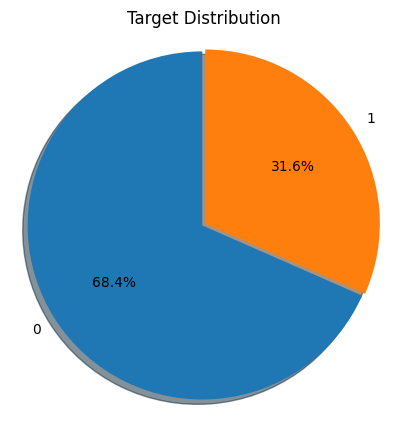

Any Unique records exist in PatientID Column: False


In [ ]:
label_count=train_bbox_df['Target'].value_counts()
explode = (0.01,0.01)

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(label_count.values, explode=explode, labels=label_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Target Distribution')
plt.show()
print("Any Unique records exist in PatientID Column:" ,train_bbox_df['patientId'].is_unique)

In [ ]:
duplicate = train_bbox_df[train_bbox_df.duplicated(['patientId'])]

print("Duplicate Rows based on PatientID :", duplicate.patientId.count())

# Print the resultant Dataframe
duplicate


Duplicate Rows based on PatientID : 3543


patientId      x      y  width  height  \
5      00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0   
9      00704310-78a8-4b38-8475-49f4573b2dbb  695.0  575.0  162.0   137.0   
15     00aecb01-a116-45a2-956c-08d2fa55433f  547.0  299.0  119.0   165.0   
17     00c0b293-48e7-4e16-ac76-9269ba535a62  650.0  511.0  206.0   284.0   
20     00f08de1-517e-4652-a04f-d1dc9ee48593  571.0  275.0  230.0   476.0   
...                                     ...    ...    ...    ...     ...   
30209  c18d1138-ba74-4af5-af21-bdd4d2c96bb5  295.0  473.0  133.0   176.0   
30215  c1cddf32-b957-4753-acaa-472ab1447e86  766.0  475.0  135.0   213.0   
30220  c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2  316.0  504.0  179.0   273.0   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  185.0  298.0  228.0   379.0   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  424.0  201.0   356.0   

       Target  
5           1  
9           1  
15          1  
17          1  
20          1  
...       ...  
30209       1  
30215       1  
30220       1  
30222       1  
30226       1  

[3543 rows x 6 columns]

In [ ]:
Class_labels = pd.read_csv('/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv')
Class_labels.shape


(30227, 2)

In [ ]:
Class_labels.head()

patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity

In [ ]:
Class_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


In [ ]:
Class_labels['class'].value_counts()

class
No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: count, dtype: int64

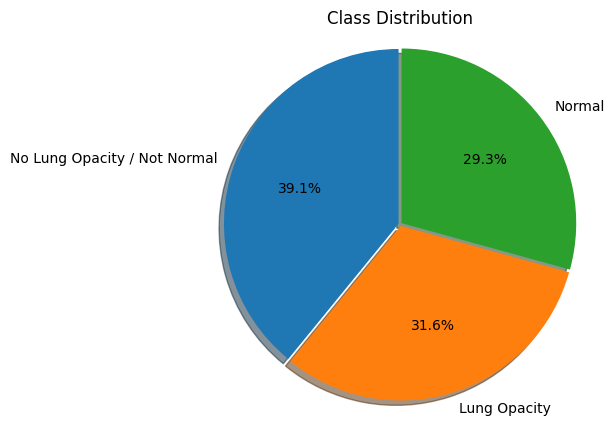

In [ ]:
label_count=Class_labels['class'].value_counts()
explode = (0.01,0.01,0.01)

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(label_count.values, explode=explode, labels=label_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Class Distribution')
plt.show()

Each patientId corresponds to a unique image class as per below depending what is the current state of the patient's lung as per below,
- 'No Lung Opacity / Not Normal'
- 'Normal'
- 'Lung Opacity'.

In [ ]:
def get_feature_distribution(data, feature):
  # Count for each label
  label_counts = data[feature].value_counts()
  # Count the number of items in each class
  total_samples = len(data)
  print("Feature: {}".format(feature))
  for i in range(len(label_counts)):
    label = label_counts.index[i]
    count = label_counts.values[i]
    percent = int((count / total_samples) * 10000) / 100
    print("{:<30s}: {} which is {}% of the total data in the dataset".format(label, count, percent))

In [ ]:
get_feature_distribution(Class_labels, 'class')

Feature: class
No Lung Opacity / Not Normal  : 11821 which is 39.1% of the total data in the dataset
Lung Opacity                  : 9555 which is 31.61% of the total data in the dataset
Normal                        : 8851 which is 29.28% of the total data in the dataset


In [ ]:
duplicateClassRowsDF = Class_labels[Class_labels.duplicated(['patientId'])]
duplicateClassRowsDF.shape
print('No of dulicate rows: ', duplicateClassRowsDF.shape[0])

No of dulicate rows:  3543


In [ ]:
duplicateClassRowsDF.head(5)

patientId         class
5   00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity
9   00704310-78a8-4b38-8475-49f4573b2dbb  Lung Opacity
15  00aecb01-a116-45a2-956c-08d2fa55433f  Lung Opacity
17  00c0b293-48e7-4e16-ac76-9269ba535a62  Lung Opacity
20  00f08de1-517e-4652-a04f-d1dc9ee48593  Lung Opacity

In [ ]:
Class_labels[Class_labels.patientId=='00c0b293-48e7-4e16-ac76-9269ba535a62']

patientId         class
16  00c0b293-48e7-4e16-ac76-9269ba535a62  Lung Opacity
17  00c0b293-48e7-4e16-ac76-9269ba535a62  Lung Opacity

In [ ]:
#Step 3: Map training and testing images to its annotations.

# Load the bounding box annotations
#train_bbox_df = pd.read_csv("/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv")

# Create mappings for training images to bounding boxes
train_image_bbox_map = {}
for index, row in train_bbox_df.iterrows():
    patient_id = row['patientId']
    x_min = row['x']
    y_min = row['y']
    width = row['width']
    height = row['height']

    # Check for NaN values in bounding box coordinates
    if pd.isna(x_min) or pd.isna(y_min) or pd.isna(width) or pd.isna(height):
      continue  # Skip rows with missing bounding box information

    # Store the bounding box information as a tuple (x_min, y_min, width, height)
    if patient_id not in train_image_bbox_map:
        train_image_bbox_map[patient_id] = []
    train_image_bbox_map[patient_id].append((x_min, y_min, width, height))

# Example usage: Accessing bounding boxes for a particular image
# Print the first 5 patient IDs and their associated bounding boxes
for patient_id, bboxes in list(train_image_bbox_map.items())[:5]:
    print(f"Patient ID: {patient_id}, Bounding Boxes: {bboxes}")

# Note: Test images do not have corresponding bounding box annotations in the sample submission file
# Thus, there is no mapping to create for test images in this step.

Patient ID: 00436515-870c-4b36-a041-de91049b9ab4, Bounding Boxes: [(264.0, 152.0, 213.0, 379.0), (562.0, 152.0, 256.0, 453.0)]
Patient ID: 00704310-78a8-4b38-8475-49f4573b2dbb, Bounding Boxes: [(323.0, 577.0, 160.0, 104.0), (695.0, 575.0, 162.0, 137.0)]
Patient ID: 00aecb01-a116-45a2-956c-08d2fa55433f, Bounding Boxes: [(288.0, 322.0, 94.0, 135.0), (547.0, 299.0, 119.0, 165.0)]
Patient ID: 00c0b293-48e7-4e16-ac76-9269ba535a62, Bounding Boxes: [(306.0, 544.0, 168.0, 244.0), (650.0, 511.0, 206.0, 284.0)]
Patient ID: 00f08de1-517e-4652-a04f-d1dc9ee48593, Bounding Boxes: [(181.0, 184.0, 206.0, 506.0), (571.0, 275.0, 230.0, 476.0)]


In [ ]:

train_df.head(5)

# Merging the Dataset - 'labels' and 'class_labels':
training_data = pd.concat([train_df, Class_labels['class']], axis = 1)

training_data.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal  
2  No Lung Opacity / Not Normal  
3                        Normal  
4                  Lung Opacity

Text(0.5, 1.0, 'Class and Target  Distrubution')

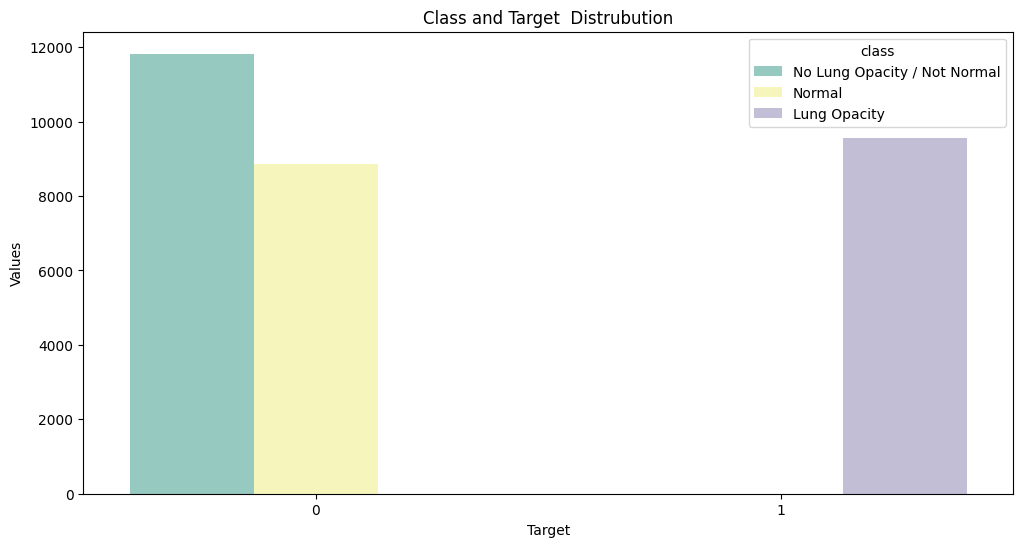

In [ ]:
fig, ax = plt.subplots(nrows = 1, figsize = (12, 6))
temp = training_data.groupby('Target')['class'].value_counts()
data_target_class = pd.DataFrame(data = {'Values': temp.values}, index = temp.index).reset_index()
sns.barplot(ax = ax, x = 'Target', y = 'Values', hue = 'class', data = data_target_class, palette = 'Set3')
plt.title('Class and Target  Distrubution')

In [ ]:
# Number of duplicates in patients:
print('Number of unique patientId are: {}'.format(Class_labels['patientId'].nunique()))

Number of unique patientId are: 26684


In [ ]:
# import pydicom as dcm
# def inspectImages(data):
#     img_data = list(data.T.to_dict().values())
#     f, ax = plt.subplots(3,3, figsize=(16,18))
#     for i,data_row in enumerate(img_data):
#         patientImage = data_row['patientId']
#        # dcm_file = '/content/stage_2_train_images/'+'{}.dcm'.format(patientImage)
#         dcm_file = '/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/'+'{}.dcm'.format(patientImage)

#         # Use dcmread instead of read_file
#         data_row_img_data = dcm.dcmread(dcm_file)
#         modality = data_row_img_data.Modality
#         age = data_row_img_data.PatientAge
#         sex = data_row_img_data.PatientSex
#         data_row_img = dcm.dcmread(dcm_file)
#         ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone)
#         ax[i//3, i%3].axis('off')
#         ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\Bounds: {}:{}:{}:{}'.format(
#                 data_row['patientId'],
#                 modality, age, sex, data_row['Target'], data_row['class'],
#                 data_row['x'],data_row['y'],data_row['width'],data_row['height']))
#         label = data_row["class"]
#         if not math.isnan(data_row['x']):
#             x, y, width, height  =  data_row['x'],data_row['y'],data_row['width'],data_row['height']
#             rect = patches.Rectangle((x, y),width, height,
#                                  linewidth = 2,
#                                  edgecolor = 'r',
#                                  facecolor = 'none')

#         # Draw the bounding box on top of the image
#             ax[i//3, i%3].add_patch(rect)

#     plt.show()

# # Function to preprocess and visualize images
# def preprocess_and_visualize(image_path, target):
#     # Load DICOM image
#     ds = dcm.dcmread(image_path)
#     image = ds.pixel_array

#     # Normalize pixel values to [0, 1]
#     image = image / 255.0

#     # Display the image
#     plt.figure(figsize=(6, 6))
#     plt.imshow(image, cmap=plt.cm.gray)
#     plt.title(f"Image Class: {target}")
#     plt.axis('off')
#     plt.show()

# # Function to preprocess and visualize images
# def preprocess_and_visualize(image_path, target):
#     # Load DICOM image
#     ds = dcm.dcmread(image_path)
#     image = ds.pixel_array

#     # Normalize pixel values to [0, 1]
#     image = image / 255.0

#     # Display the image
#     plt.figure(figsize=(6, 6))
#     plt.imshow(image, cmap=plt.cm.gray)
#     plt.title(f"Image Class: {target}")
#     plt.axis('off')
#     plt.show()



In [ ]:
# sample_patient_ids = list(train_image_class_map.keys())[:5]


# # Replace with the actual path to the images
# image_dir = "/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images"

# for patient_id in sample_patient_ids:
#     image_path = os.path.join(image_dir, f"{patient_id}.dcm")
#     if os.path.exists(image_path):
#         target = train_image_class_map[patient_id]
#         preprocess_and_visualize(image_path, target)
#     else:
#         print(f"Image not found for patient ID: {patient_id}")

In [ ]:
#view images with target is 1
# inspectImages(training_data[training_data['Target']==1].sample(9))



In [ ]:
#view images with target is 0
# inspectImages(training_data[training_data['Target']==0].sample(9))


In [ ]:
#check duplicate and remove

one = training_data[training_data.Target == 1].drop_duplicates('patientId').shape[0]
zero = training_data[training_data.Target == 0].drop_duplicates('patientId').shape[0]
total = training_data.drop_duplicates('patientId').shape[0]

No of entries which has Pneumonia: 6012 i.e., 23.0%
No of entries which don't have Pneumonia: 20672 i.e., 1.0%


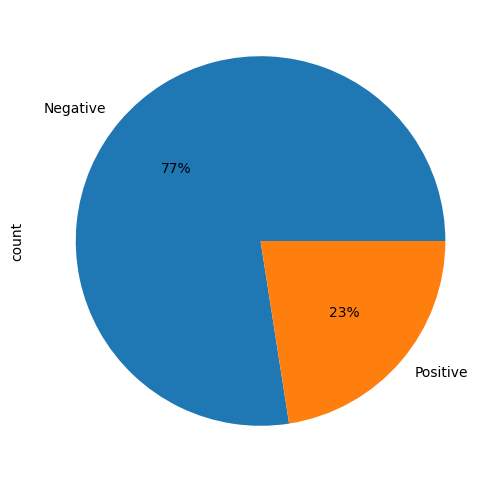

In [ ]:
print(f'No of entries which has Pneumonia: {one} i.e., {round(one/total*100, 0)}%')
print(f'No of entries which don\'t have Pneumonia: {zero} i.e., {round(zero/total, 0)}%')
_ = training_data.drop_duplicates('patientId').drop_duplicates('patientId')['Target'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Negative', 'Positive'], figsize = (10, 6))

In [ ]:
print('Number of nulls in bounding box columns: {}'.format(training_data[['x', 'y', 'width', 'height']].isnull().sum().to_dict()))

Number of nulls in bounding box columns: {'x': 20672, 'y': 20672, 'width': 20672, 'height': 20672}


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [ ]:
bounding_box = training_data.groupby('patientId').size().to_frame('number_of_boxes').reset_index()
train_labels = training_data.merge(bounding_box, on = 'patientId', how = 'left')
print('Number of patientIds per bounding box in the dataset: ')
(bounding_box.groupby('number_of_boxes').size().to_frame('number_of_patientId').reset_index().set_index('number_of_boxes').sort_values(by = 'number_of_boxes'))

Number of patientIds per bounding box in the dataset: 


number_of_patientId
number_of_boxes                     
1                              23286
2                               3266
3                                119
4                                 13

Thus, there are 23286 unique patients which have only one entry in the dataset.

There are bounding boxs in the dataset are as per below,
- 3266 with 2 bounding box
- 119 with 3 bounding box  
- 13 with 4 bounding box coordinates.


In [ ]:
# Merging the two dataset - 'train_labels' and 'class_labels':
training_data = pd.concat([train_labels], axis = 1)
print('After merging, the dataset looks like: \n')
training_data.head()

After merging, the dataset looks like: 



patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  number_of_boxes  
0  No Lung Opacity / Not Normal                1  
1  No Lung Opacity / Not Normal                1  
2  No Lung Opacity / Not Normal                1  
3                        Normal                1  
4                  Lung Opacity                2

In [ ]:
print('After merge, the dataset has {} rows and {} columns.'.format(training_data.shape[0], training_data.shape[1]))

After merge, the dataset has 30227 rows and 8 columns.


In [ ]:
import pydicom as dcm
data_row_img_data=[]
def inspectImages(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']
       # dcm_file = '/content/stage_2_train_images/'+'{}.dcm'.format(patientImage)
        dcm_file = '/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/'+'{}.dcm'.format(patientImage)

        # Use dcmread instead of read_file
        data_row_img_data = dcm.dcmread(dcm_file)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = dcm.dcmread(dcm_file)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone)
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\Bounds: {}:{}:{}:{}'.format(
                data_row['patientId'],
                modality, age, sex, data_row['Target'], data_row['class'],
                data_row['x'],data_row['y'],data_row['width'],data_row['height']))
        label = data_row["class"]
        if not math.isnan(data_row['x']):
            x, y, width, height  =  data_row['x'],data_row['y'],data_row['width'],data_row['height']
            rect = patches.Rectangle((x, y),width, height,
                                 linewidth = 2,
                                 edgecolor = 'r',
                                 facecolor = 'none')

        # Draw the bounding box on top of the image
            ax[i//3, i%3].add_patch(rect)

    plt.show()

# Function to preprocess and visualize images
def preprocess_and_visualize(image_path, target):
    # Load DICOM image
    ds = dcm.dcmread(image_path)
    image = ds.pixel_array

    # Normalize pixel values to [0, 1]
    image = image / 255.0

    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(f"Image Class: {target}")
    plt.axis('off')
    plt.show()

# Function to preprocess and visualize images
def preprocess_and_visualize(image_path, target):
    # Load DICOM image
    ds = dcm.dcmread(image_path)
    image = ds.pixel_array

    # Normalize pixel values to [0, 1]
    image = image / 255.0

    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(f"Image Class: {target}")
    plt.axis('off')
    plt.show()

def get_feature_distribution(data, feature):
  # Count for each label
  label_counts = data[feature].value_counts()
  # Count the number of items in each class
  total_samples = len(data)
  print("Feature: {}".format(feature))
  for i in range(len(label_counts)):
    label = label_counts.index[i]
    count = label_counts.values[i]
    percent = int((count / total_samples) * 10000) / 100
    print("{:<30s}: {} which is {}% of the total data in the dataset".format(label, count, percent))

def show_dicom_images(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']
        dcm_file = '/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/'+'{}.dcm'.format(patientImage)

        # Use dcmread instead of read_file
        data_row_img_data = dcm.dcmread(dcm_file)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = dcm.dcmread(dcm_file)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone)
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\nPart: {}\nViewPosition: {}'.format(
                data_row['patientId'],
                modality, age, sex, data_row['Target'], data_row['class'],
                data_row_img_data.BodyPartExamined, data_row_img_data.ViewPosition))
        label = data_row["class"]
        if not math.isnan(data_row['x']):
            x, y, width, height  =  data_row['x'],data_row['y'],data_row['width'],data_row['height']
            rect = patches.Rectangle((x, y),width, height,
                                 linewidth = 2,
                                 edgecolor = 'r',
                                 facecolor = 'none')

        # Draw the bounding box on top of the image
            ax[i//3, i%3].add_patch(rect)

    plt.show()


In [ ]:
# ds = dcm.dcmread(image_path)
# print("------------Diffrent Methods to read image data ------------");

# print("1. Read By Tuple (Tuple of 2 integer):-")

# print("Patient's Name = ",  data_row_img_data[0][((0x0010,0x0010))].value);
# print("Modality = ",  data_row_img_data[0][((0x0008, 0x0060))].value);
# print("Body Part Examined = ",  data_row_img_data[0][((0x0018, 0x0015))].value);



# print("2. Read By Access Methods:")
# print("Patient's Name = ", data_row_img_data[0].PatientName );
# print("Modality = ", data_row_img_data[0].Modality);
# print("Body Part Examined =", data_row_img_data[0].PatientID)  ;




    # print("3. Read By Data Frame:")
    # print("Patient's Name = ", df_Dicom_train_Image_raw_data.loc[0,"Patient's Name"]);
    # print("Body Part Examined = ", df_Dicom_train_Image_raw_data.loc[0,"Modality"]);
    # print("Body Part Examined = ", df_Dicom_train_Image_raw_data.loc[0,"Body Part Examined"]);


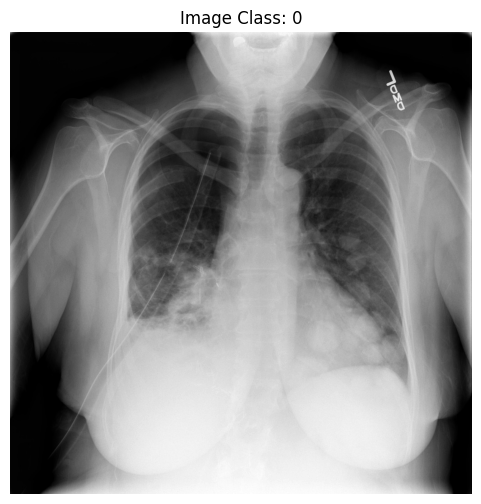

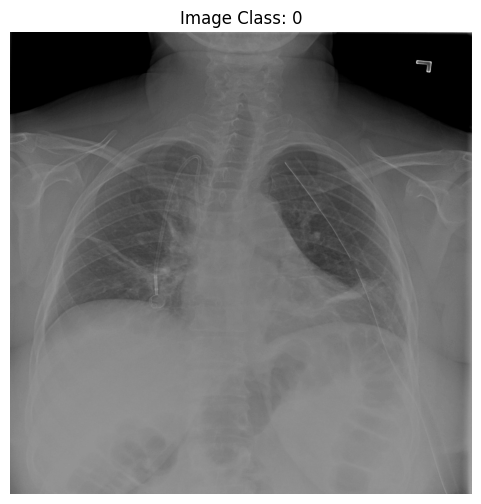

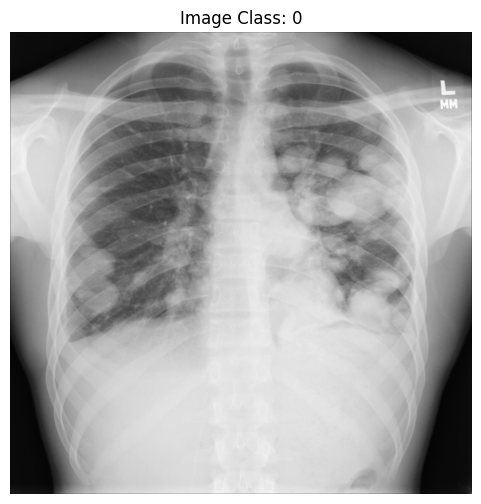

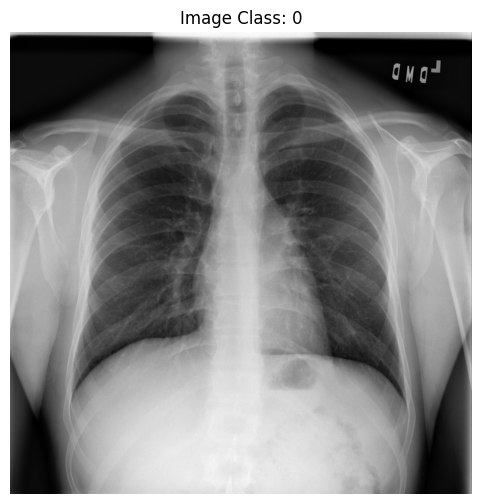

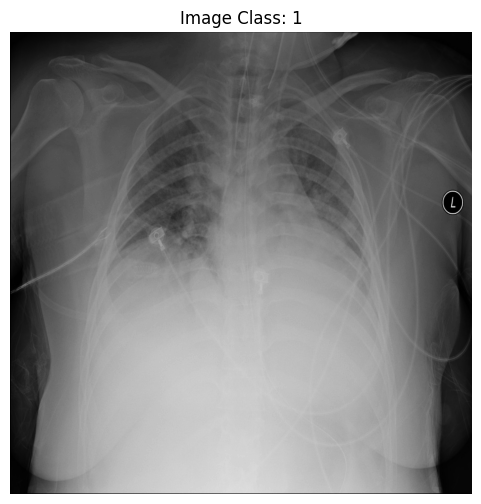

In [ ]:
 #Step 5: Display images with bounding box. [ 5 points ]
sample_patient_ids = list(train_image_class_map.keys())[:5]


image_dir = "/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images"

for patient_id in sample_patient_ids:
    image_path = os.path.join(image_dir, f"{patient_id}.dcm")
    if os.path.exists(image_path):
        target = train_image_class_map[patient_id]
        preprocess_and_visualize(image_path, target)
    else:
        print(f"Image not found for patient ID: {patient_id}")

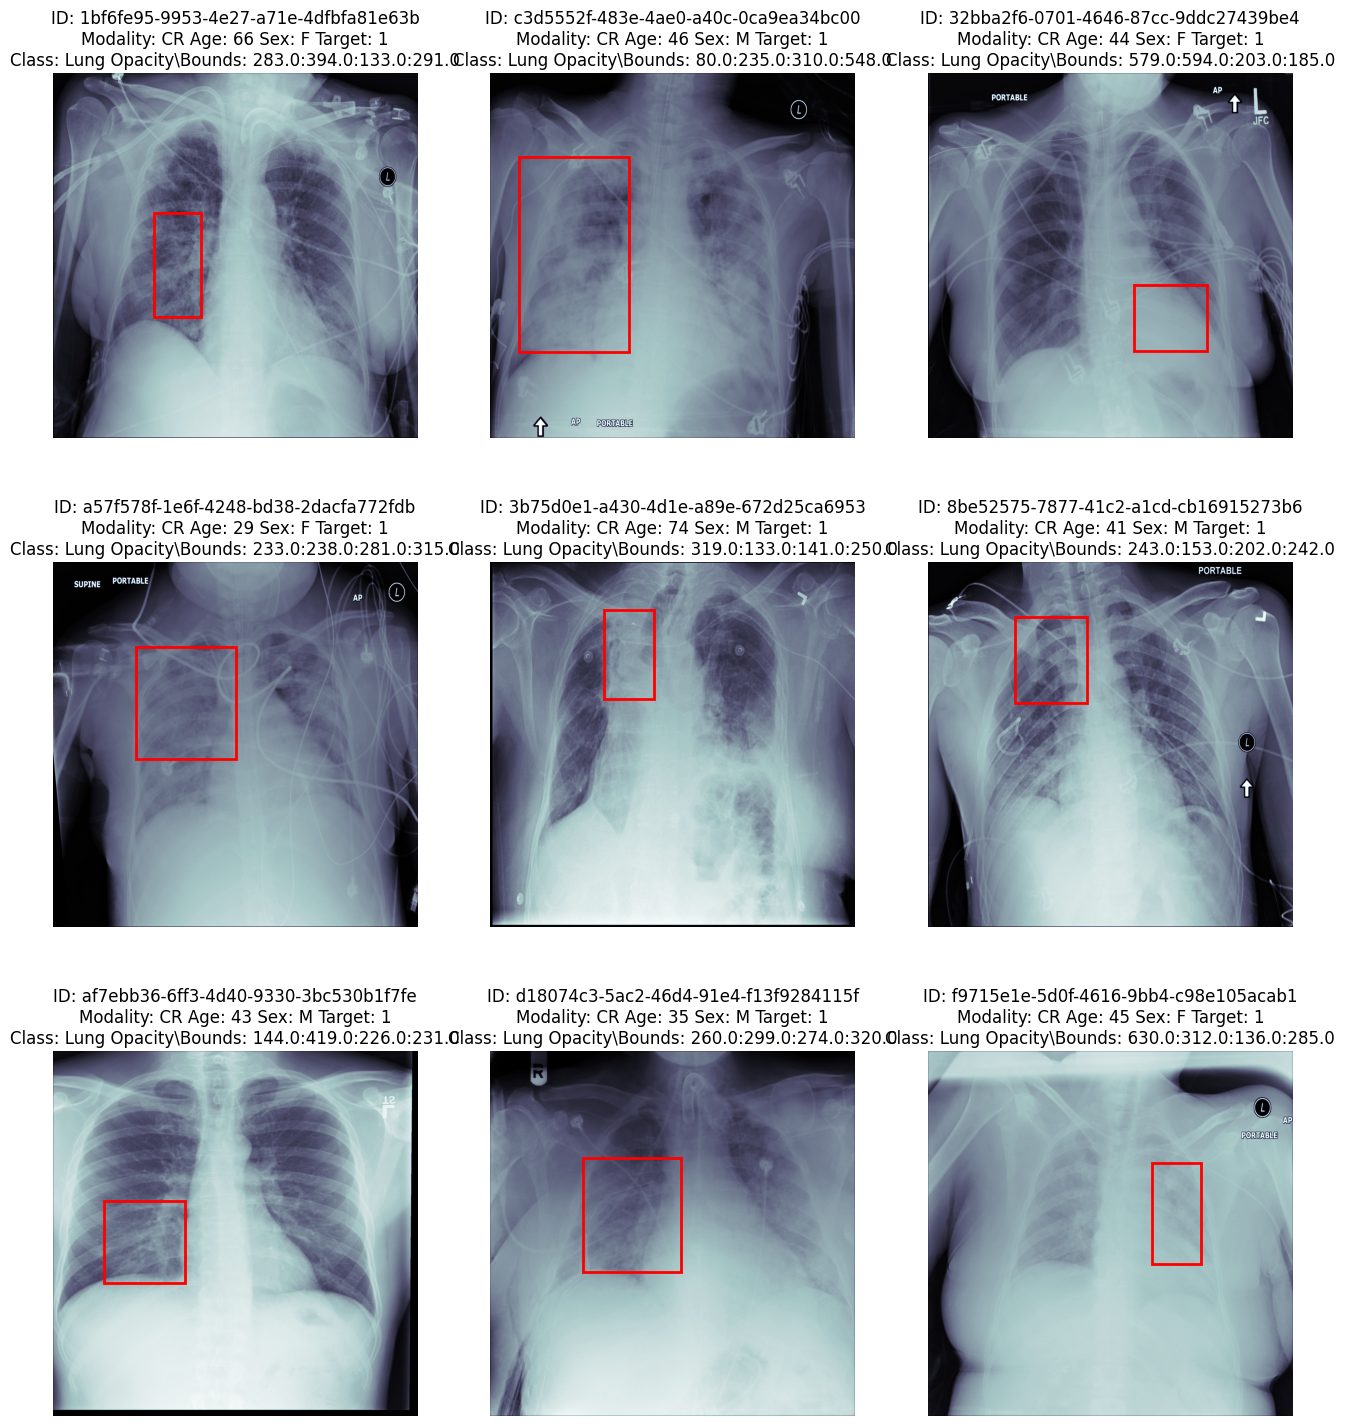

In [ ]:
#view images with target is 1
inspectImages(training_data[training_data['Target']==1].sample(9))



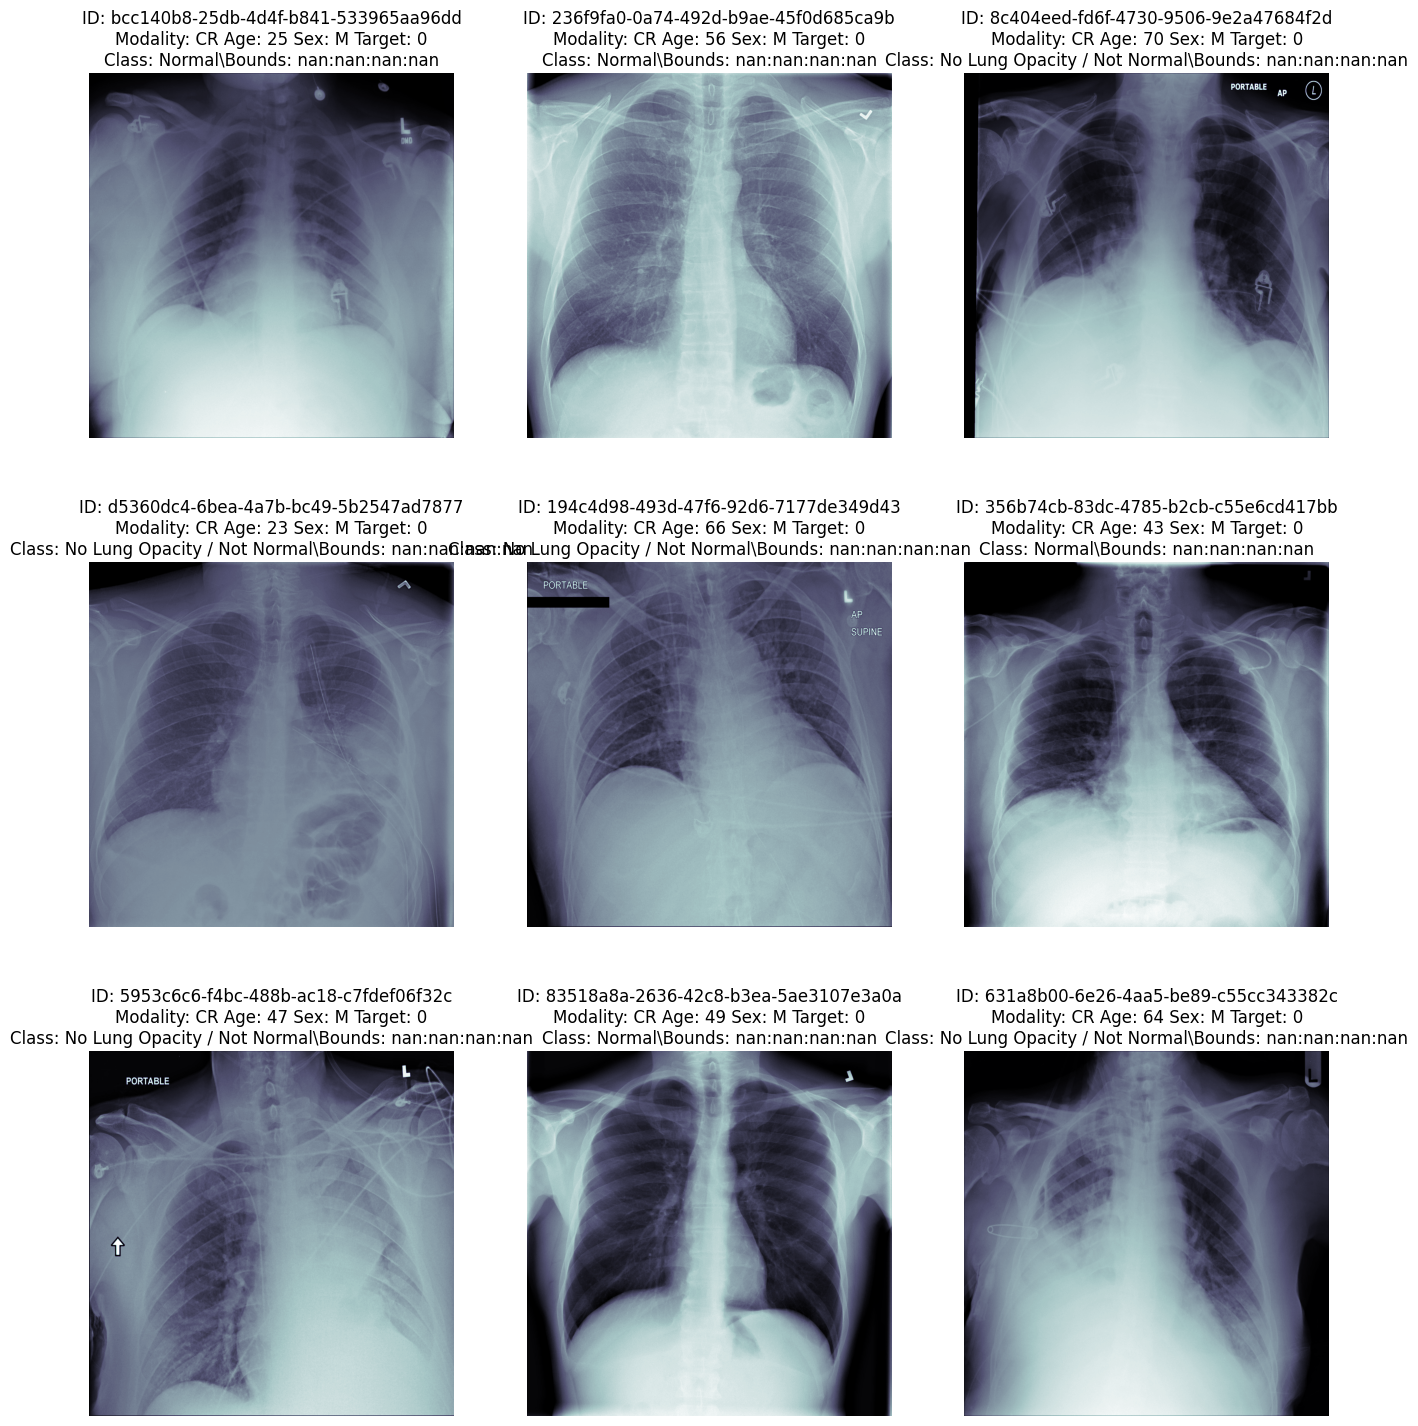

In [ ]:
inspectImages(training_data[training_data['Target']==0].sample(9))


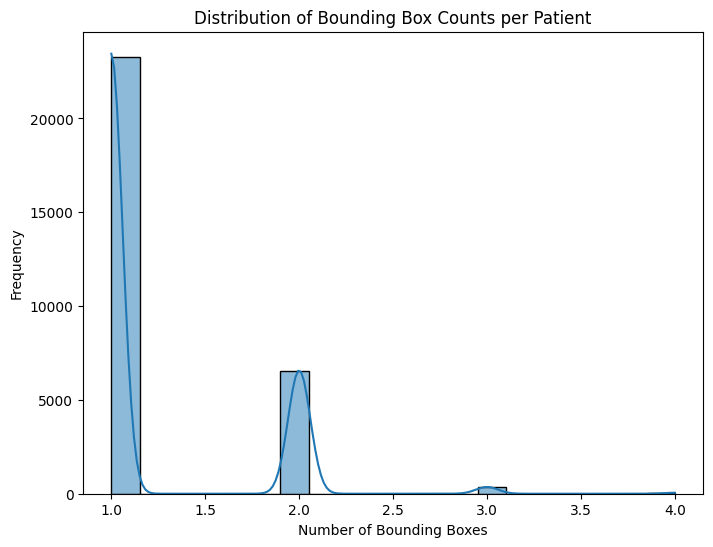

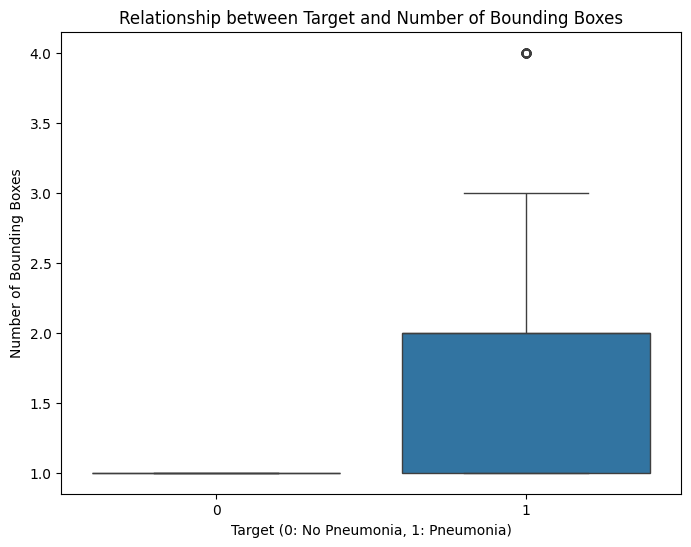

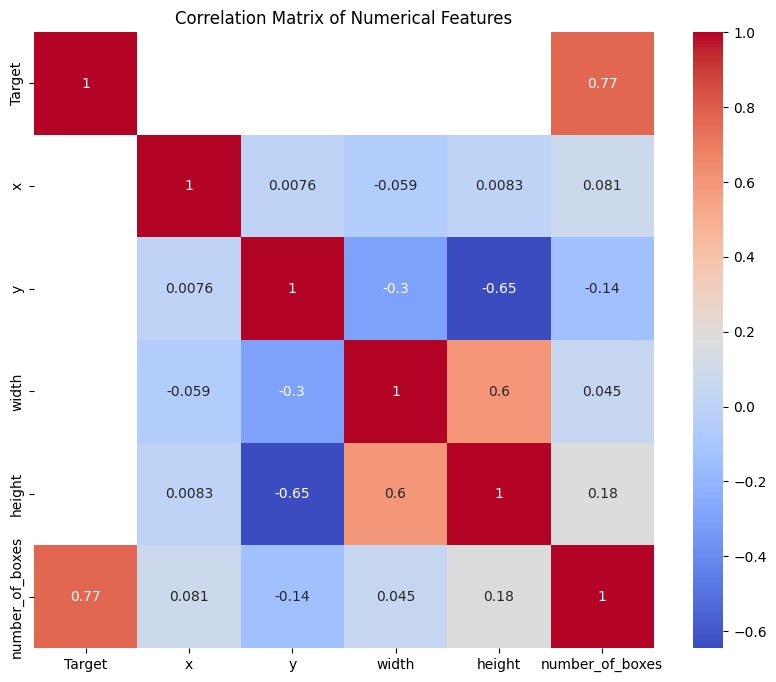

In [ ]:

#Distribution of bounding box counts per patient
plt.figure(figsize=(8, 6))
sns.histplot(training_data['number_of_boxes'], bins=20, kde=True)
plt.title('Distribution of Bounding Box Counts per Patient')
plt.xlabel('Number of Bounding Boxes')
plt.ylabel('Frequency')
plt.show()

#Relationship between target and number of bounding boxes
plt.figure(figsize=(8, 6))
sns.boxplot(x='Target', y='number_of_boxes', data=training_data)
plt.title('Relationship between Target and Number of Bounding Boxes')
plt.xlabel('Target (0: No Pneumonia, 1: Pneumonia)')
plt.ylabel('Number of Bounding Boxes')
plt.show()

#Correlation matrix of numerical features
numerical_features = ['Target', 'x', 'y', 'width', 'height', 'number_of_boxes']
correlation_matrix = training_data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
#display Metadata of the image so the remaining information can be added to the dataset
sample_patientId = training_data['patientId'][0]
dcm_file = '/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/'+'{}.dcm'.format(sample_patientId)

dcm_data = dcm.dcmread(dcm_file)

print('Metadata of the image consists of \n', dcm_data)

Metadata of the image consists of 
 Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 202
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002,0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008,0020) Study Date                          DA: '19010101'
(000


by looking at above sample we can see that dicom file contains some of the information that can be used for further analysis such as sex, age, body part examined, view position and modality.

Size of this image is 1024 x 1024 (rows x columns).

In [ ]:
from glob import glob
training_image_path = '/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/'

images = pd.DataFrame({'path': glob(os.path.join(training_image_path, '*.dcm'))})
images['patientId'] = images['path'].map(lambda x:os.path.splitext(os.path.basename(x))[0])
print('Columns in the training images dataframe: {}'.format(list(images.columns)))

Columns in the training images dataframe: ['path', 'patientId']


In [ ]:
# Merging the images dataframe with training_data dataframe
training_data = training_data.merge(images, on = 'patientId', how = 'left')
print('After merging the two dataframe, the training_data has {} rows and {} columns.'.format(training_data.shape[0], training_data.shape[1]))

After merging the two dataframe, the training_data has 30227 rows and 9 columns.


In [ ]:
#view final data
print('The training_data dataframe as of now stands like\n')
training_data.head()

The training_data dataframe as of now stands like



patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  number_of_boxes  \
0  No Lung Opacity / Not Normal                1   
1  No Lung Opacity / Not Normal                1   
2  No Lung Opacity / Not Normal                1   
3                        Normal                1   
4                  Lung Opacity                2   

                                                path  
0  /content/drive/MyDrive/Vishal_Notebook/rsna-pn...  
1  /content/drive/MyDrive/Vishal_Notebook/rsna-pn...  
2  /content/drive/MyDrive/Vishal_Notebook/rsna-pn...  
3  /content/drive/MyDrive/Vishal_Notebook/rsna-pn...  
4  /content/drive/MyDrive/Vishal_Notebook/rsna-pn...

In [ ]:
# use tqdm

from tqdm import tqdm

# Assuming 'training_data' and 'images' DataFrames are already defined as in your provided code.

metadata_cols = ['Modality', 'PatientAge', 'PatientSex', 'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns', 'PixelSpacing']
metadata_df = pd.DataFrame(columns=metadata_cols)

for index, row in tqdm(training_data.iterrows(), total=len(training_data)):
    dcm_file = row['path']
    try:
        dcm_data = dcm.dcmread(dcm_file)
        metadata_row = {col: getattr(dcm_data, col, None) for col in metadata_cols}  # Handle potential missing attributes
        metadata_df = pd.concat([metadata_df, pd.DataFrame([metadata_row])], ignore_index=True)
    except Exception as e:
        print(f"Error processing {dcm_file}: {e}")
        # Handle errors appropriately (e.g., fill with NaN or skip the row)
        metadata_row = {col: None for col in metadata_cols}  # Fill with NaN for the problematic row
        metadata_df = pd.concat([metadata_df, pd.DataFrame([metadata_row])], ignore_index=True)


# Concatenate the metadata with the training data
training_data = pd.concat([training_data, metadata_df], axis=1)

100%|██████████| 30227/30227 [03:26<00:00, 146.14it/s]


In [ ]:
training_data

patientId      x      y  width  height  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN   
2      00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN   
4      00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0   
...                                     ...    ...    ...    ...     ...   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  185.0  298.0  228.0   379.0   
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba    NaN    NaN    NaN     NaN   
30224  c1f6b555-2eb1-4231-98f6-50a963976431    NaN    NaN    NaN     NaN   
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a  570.0  393.0  261.0   345.0   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  424.0  201.0   356.0   

       Target                         class  number_of_boxes  \
0           0  No Lung Opacity / Not Normal                1   
1           0  No Lung Opacity / Not Normal                1   
2           0  No Lung Opacity / Not Normal                1   
3           0                        Normal                1   
4           1                  Lung Opacity                2   
...       ...                           ...              ...   
30222       1                  Lung Opacity                2   
30223       0                        Normal                1   
30224       0                        Normal                1   
30225       1                  Lung Opacity                2   
30226       1                  Lung Opacity                2   

                                                    path Modality PatientAge  \
0      /content/drive/MyDrive/Vishal_Notebook/rsna-pn...       CR         51   
1      /content/drive/MyDrive/Vishal_Notebook/rsna-pn...       CR         48   
2      /content/drive/MyDrive/Vishal_Notebook/rsna-pn...       CR         19   
3      /content/drive/MyDrive/Vishal_Notebook/rsna-pn...       CR         28   
4      /content/drive/MyDrive/Vishal_Notebook/rsna-pn...       CR         32   
...                                                  ...      ...        ...   
30222  /content/drive/MyDrive/Vishal_Notebook/rsna-pn...       CR         54   
30223  /content/drive/MyDrive/Vishal_Notebook/rsna-pn...       CR         46   
30224  /content/drive/MyDrive/Vishal_Notebook/rsna-pn...       CR         45   
30225  /content/drive/MyDrive/Vishal_Notebook/rsna-pn...       CR         72   
30226  /content/drive/MyDrive/Vishal_Notebook/rsna-pn...       CR         72   

      PatientSex BodyPartExamined ViewPosition ConversionType  Rows Columns  \
0              F            CHEST           PA            WSD  1024    1024   
1              F            CHEST           PA            WSD  1024    1024   
2              M            CHEST           AP            WSD  1024    1024   
3              M            CHEST           PA            WSD  1024    1024   
4              F            CHEST           AP            WSD  1024    1024   
...          ...              ...          ...            ...   ...     ...   
30222          M            CHEST           AP            WSD  1024    1024   
30223          F            CHEST           PA            WSD  1024    1024   
30224          M            CHEST           PA            WSD  1024    1024   
30225          F            CHEST           AP            WSD  1024    1024   
30226          F            CHEST           AP            WSD  1024    1024   

                                     PixelSpacing  
0      [0.14300000000000002, 0.14300000000000002]  
1      [0.19431099999999998, 0.19431099999999998]  
2                                  [0.168, 0.168]  
3      [0.14300000000000002, 0.14300000000000002]  
4                                  [0.139, 0.139]  
...                                           ...  
30222                              [0.139, 0.139]  
30223  [0.1430000000000000

In [ ]:
# Saving the training_data for further use:
training_data.to_pickle('training_data.pkl')

In [ ]:
print('Modality for the images obtained is: {} \n'.format(training_data['Modality'].unique()[0]))

Modality for the images obtained is: CR 



In [ ]:
#check and examine other added columns with differnt analysis

training_data.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'Target', 'class',
       'number_of_boxes', 'path', 'Modality', 'PatientAge', 'PatientSex',
       'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns',
       'PixelSpacing'],
      dtype='object')

In [ ]:
get_feature_distribution(training_data.drop_duplicates('patientId'), 'PatientSex')

Feature: PatientSex
M                             : 15166 which is 56.83% of the total data in the dataset
F                             : 11518 which is 43.16% of the total data in the dataset


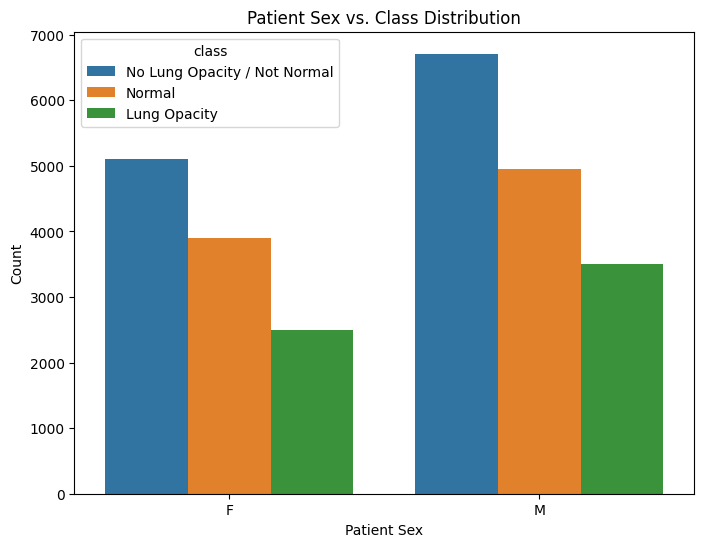

In [ ]:
#Patient their sex wise class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='PatientSex', hue='class', data=training_data.drop_duplicates('patientId'))
plt.title('Patient Sex vs. Class Distribution')
plt.xlabel('Patient Sex')
plt.ylabel('Count')
plt.show()

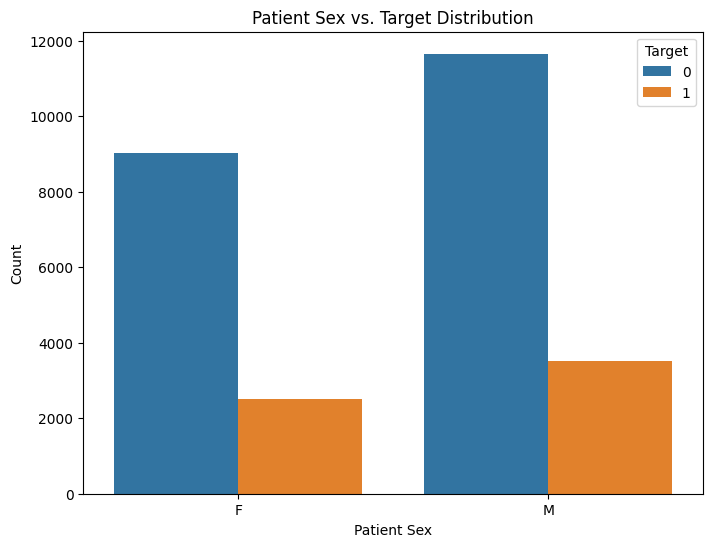

In [ ]:
#patient their sex wise target distribution

plt.figure(figsize=(8, 6))
sns.countplot(x='PatientSex', hue='Target', data=training_data.drop_duplicates('patientId'))
plt.title('Patient Sex vs. Target Distribution')
plt.xlabel('Patient Sex')
plt.ylabel('Count')
plt.show()

Distribution of `PatientAge`: Overall and Target = 1


<ipython-input-62-4a4a96525421>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = (sns.distplot(training_data['PatientAge']).set_title('Distribution of PatientAge'))
<ipython-input-62-4a4a96525421>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = (sns.distplot(training_data.drop_duplicates('patientId').loc[trainin

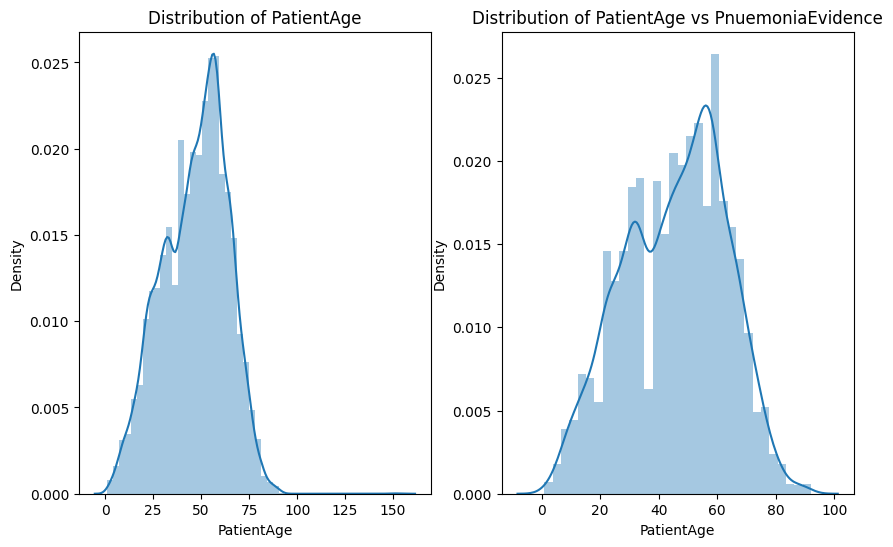

In [ ]:
print('Distribution of `PatientAge`: Overall and Target = 1')
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(121)
g = (sns.distplot(training_data['PatientAge']).set_title('Distribution of PatientAge'))

ax = fig.add_subplot(122)
g = (sns.distplot(training_data.drop_duplicates('patientId').loc[training_data['Target'] == 1, 'PatientAge']).set_title('Distribution of PatientAge vs PnuemoniaEvidence'))

In [ ]:
print('Check images obtained near {} areas.'.format(training_data['BodyPartExamined'].unique()[0]))

Check images obtained near CHEST areas.


In [ ]:
get_feature_distribution(training_data.drop_duplicates('patientId'), 'ViewPosition')

Feature: ViewPosition
PA                            : 14511 which is 54.38% of the total data in the dataset
AP                            : 12173 which is 45.61% of the total data in the dataset


The `ViewPosition` attribute in the DICOM metadata describes the patient's position during the X-ray acquisition.  Common values include:

* **PA (Posteroanterior):**  X-ray beam enters the posterior (back) of the patient and exits the anterior (front). This is the standard view for chest X-rays.
* **AP (Anteroposterior):** X-ray beam enters the anterior (front) and exits the posterior (back).  Often used for patients who can't stand or when a portable X-ray machine is used.


 **Image Quality Assessment:** Different view positions might affect image quality and the visibility of certain lung regions.  Analyzing the distribution can reveal if certain views are under- or over-represented, potentially impacting model performance.

In summary, `ViewPosition` is a crucial piece of metadata that provides context about how the image was acquired and can potentially improve the analysis or modeling of the chest X-rays.


The distribution of View Position when there is an evidence of Pneumonia:



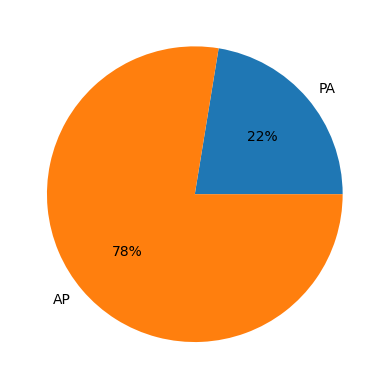

In [ ]:
#Check AP and PA distribution where target=1 (phenumonia)

print('The distribution of View Position when there is an evidence of Pneumonia:\n')
_ = training_data.drop_duplicates('patientId').loc[training_data['Target'] == 1, 'ViewPosition'].value_counts().sort_index(ascending = False).plot(kind = 'pie', autopct = '%.0f%%').set_ylabel('')

In [ ]:
print('Conversion Type for the data in Training Data: ', training_data['ConversionType'].unique()[0])

Conversion Type for the data in Training Data:  WSD


In [ ]:
print(f'The training images has {training_data.Rows.unique()[0]} rows and {training_data.Columns.unique()[0]} columns.')

The training images has 1024 rows and 1024 columns.


In [ ]:
print('The minimum and maximum recorded age of the patients are {} and {} respectively.'.format(training_data['PatientAge'].min(), training_data['PatientAge'].max()))

The minimum and maximum recorded age of the patients are 1 and 92 respectively.


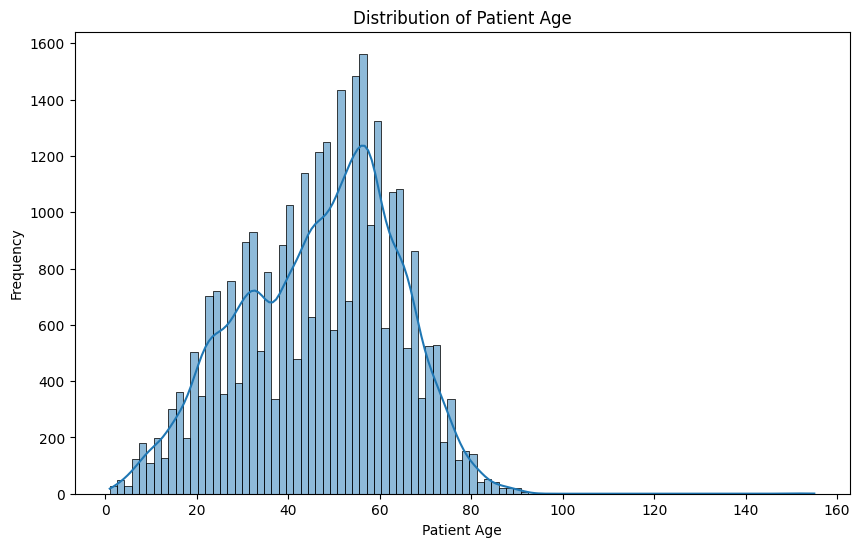

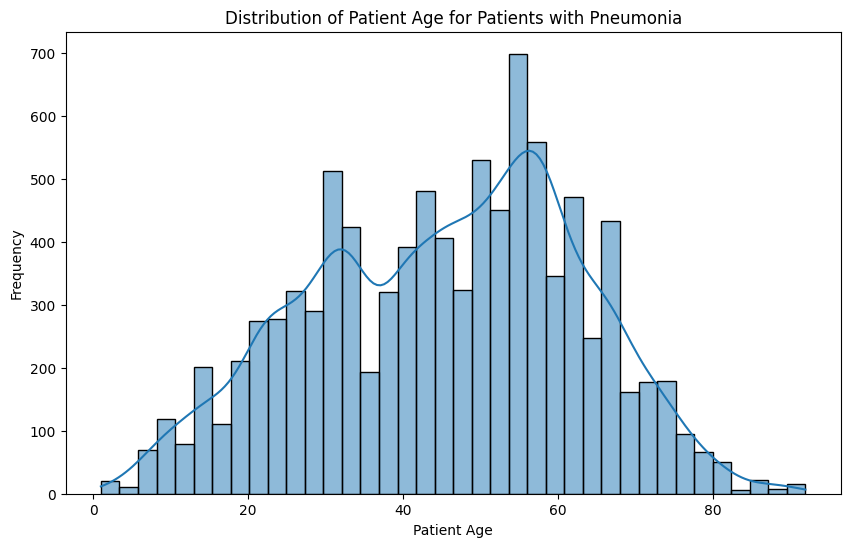

<ipython-input-69-367fd3f1a3ba>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_percentages = training_data.groupby(age_groups)['patientId'].count() / len(training_data) * 100


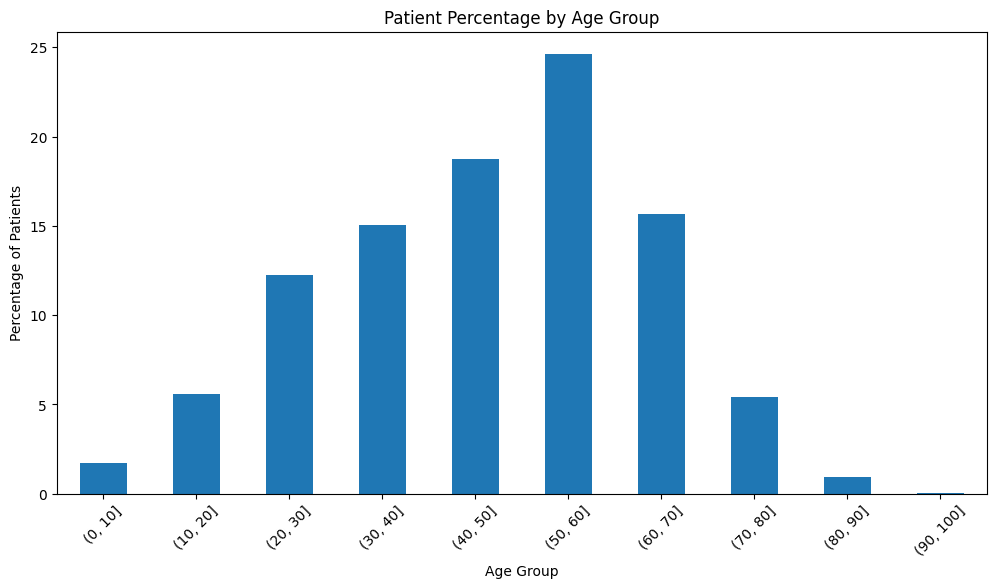

In [ ]:

# Convert 'PatientAge' to numeric, handling errors
training_data['PatientAge'] = pd.to_numeric(training_data['PatientAge'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(training_data['PatientAge'], kde=True)
plt.title('Distribution of Patient Age')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(training_data[training_data['Target'] == 1]['PatientAge'], kde=True)
plt.title('Distribution of Patient Age for Patients with Pneumonia')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.show()


# Calculate patient percentages by age group
age_groups = pd.cut(training_data['PatientAge'], bins=range(0, 101, 10))
age_percentages = training_data.groupby(age_groups)['patientId'].count() / len(training_data) * 100

#added agewise bins to dataset
training_data['PatientAgeBins'] = pd.cut(training_data['PatientAge'], bins=range(0, 101, 10))
training_data.drop_duplicates('patientId')['PatientAgeBins'].value_counts()

# Plot the patient percentages by age group
plt.figure(figsize=(12, 6))
age_percentages.plot(kind='bar')
plt.title('Patient Percentage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Patients')
plt.xticks(rotation=45)
plt.show()

In [ ]:
training_data.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  number_of_boxes  \
0  No Lung Opacity / Not Normal                1   
1  No Lung Opacity / Not Normal                1   
2  No Lung Opacity / Not Normal                1   
3                        Normal                1   
4                  Lung Opacity                2   

                                                path Modality  PatientAge  \
0  /content/drive/MyDrive/Vishal_Notebook/rsna-pn...       CR          51   
1  /content/drive/MyDrive/Vishal_Notebook/rsna-pn...       CR          48   
2  /content/drive/MyDrive/Vishal_Notebook/rsna-pn...       CR          19   
3  /content/drive/MyDrive/Vishal_Notebook/rsna-pn...       CR          28   
4  /content/drive/MyDrive/Vishal_Notebook/rsna-pn...       CR          32   

  PatientSex BodyPartExamined ViewPosition ConversionType  Rows Columns  \
0          F            CHEST           PA            WSD  1024    1024   
1          F            CHEST           PA            WSD  1024    1024   
2          M            CHEST           AP            WSD  1024    1024   
3          M            CHEST           PA            WSD  1024    1024   
4          F            CHEST           AP            WSD  1024    1024   

                                 PixelSpacing PatientAgeBins  
0  [0.14300000000000002, 0.14300000000000002]       (50, 60]  
1  [0.19431099999999998, 0.19431099999999998]       (40, 50]  
2                              [0.168, 0.168]       (10, 20]  
3  [0.14300000000000002, 0.14300000000000002]       (20, 30]  
4                              [0.139, 0.139]       (30, 40]

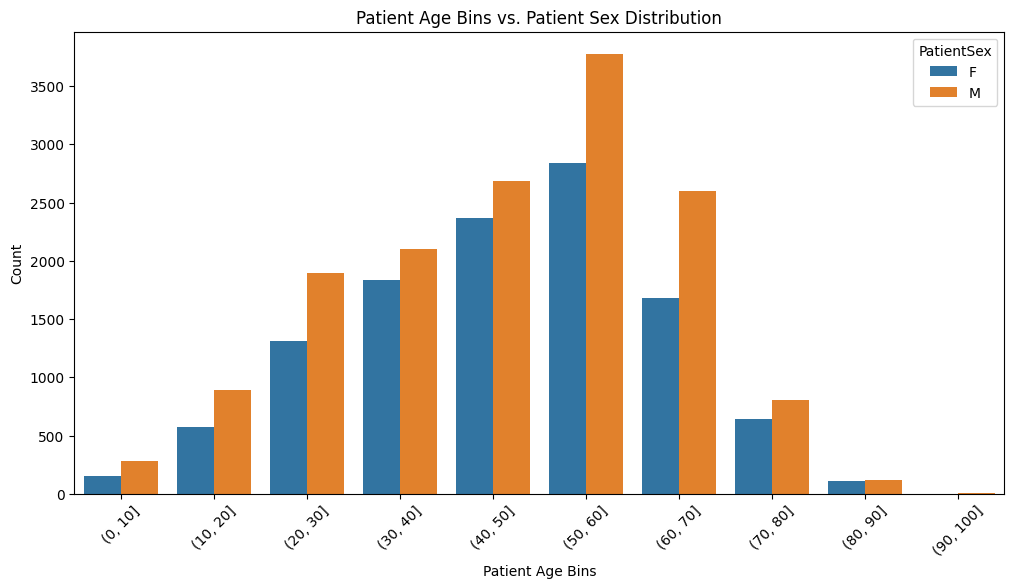

In [ ]:

# Plot patient age bins vs patient sex
plt.figure(figsize=(12, 6))
sns.countplot(x='PatientAgeBins', hue='PatientSex', data=training_data.drop_duplicates('patientId'))
plt.title('Patient Age Bins vs. Patient Sex Distribution')
plt.xlabel('Patient Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

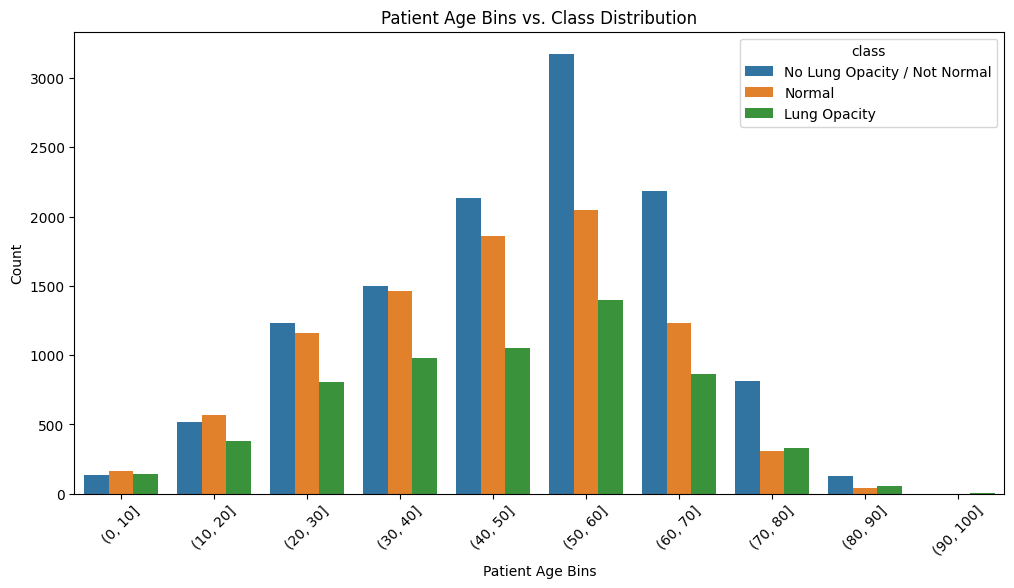

In [ ]:
# Plot patient age bins, patient sex, and class
plt.figure(figsize=(12, 6))
sns.countplot(x='PatientAgeBins', hue='class', data=training_data.drop_duplicates('patientId'))
plt.title('Patient Age Bins vs. Class Distribution')
plt.xlabel('Patient Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**1. Class Imbalance:**

The pie chart shows a significant class imbalance, with a majority of patients being negative for pneumonia. This imbalance needs to be addressed during model training (e.g., using class weights or resampling techniques).

**2. Bounding Box Analysis:**
- The code shows that most patients have a single bounding box.
- A small percentage have multiple bounding boxes, indicating multiple pneumonia instances in a single image.
- The distribution plot of bounding boxes shows the frequency of patient's with different numbers of boxes.
- The box plot comparing the target variable and the number of bounding boxes helps visualize the relationship between the presence of pneumonia and the number of bounding boxes detected.

**3. Image Metadata Analysis:**
The code extracts various metadata fields (Modality, PatientAge, PatientSex, etc.) from DICOM files.

The analysis can be improved using this metadata:
- Patient Sex: Analyzing the relationship between patient sex and the presence or absence of pneumonia.
- Patient Age: Investigating the distribution of patient ages, identifying if certain age groups have a higher prevalence of pneumonia.
- The distributions of ages of all patients and patients with pneumonia are shown in separate histograms.
- Age bins were created, and counts of patients within those age bins were displayed.
- A bar chart displays the percentage of patients within each age group.
- Body Part Examined: Checking if all images are of the chest area.
- View Position: Analyzing the distribution of 'PA' and 'AP' views, potentially assessing if certain view positions might bias the model.
- A pie chart shows the distribution of view position for patients with pneumonia.
- Pixel Spacing and Image Size: Analyzing if there are inconsistencies in image dimensions or pixel spacing that could affect model performance.
- The code prints the row and column size of the images.
- Correlation Matrix: The correlation heatmap reveals relationships between numerical features, including 'Target', bounding box coordinates, and the number of bounding boxes.

**4. Data Visualization:**

- The code visualizes the sample images with bounding boxes overlaid.
- The visualizations are crucial for understanding how the model is performing.

**Summary**
1. class imbalance is present in the dataset.
2. The training dataset(both of the csv files and training image folder) contains information of 26684 patient (unique)
3. Most of the recorded patient don't have pneumonia(target-0)
4. some of the patients have more than one bounding box. The maximum being 4.
5. The classes "No Lung Opacity/Not Normal" and "Normal" is associated with the target = 0 whereas "Lung Opacity" belong to Target = 1.
6. The images are present in dicom format, from which information like patientAge, PatientSex, ViewPosition etc are obtained
7. There are two ways from which images were ontained AP and PA. The age ranges from 1- 92.


**Model Building**

In [ ]:
#Step 6: Design, train and test basic CNN models for classification.

In [ ]:
#import libraries

import numpy as np
import pickle
import matplotlib.pyplot  as plt
import cv2
import os
import tensorflow as tf
from tensorflow.keras.layers import (    Input,
    Conv2D,
    MaxPooling2D,
    UpSampling2D,
    Concatenate,
    Activation,
    Dropout,BatchNormalization,
    Reshape,ZeroPadding2D, Convolution2D, Flatten,Dense
)
import functools
from tensorflow import keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications import MobileNet #mobilenet architecture.
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import pandas as pd
import random

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import Sequence
import random

In [ ]:
## take a 1000 images from the dataset for processing
model_trainigdata = training_data.groupby('class', group_keys=False).apply(lambda x: x.sample(10))

<ipython-input-75-11af65491338>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  model_trainigdata = training_data.groupby('class', group_keys=False).apply(lambda x: x.sample(10))


In [ ]:
model_trainigdata["class"].value_counts()

class
Lung Opacity                    10
No Lung Opacity / Not Normal    10
Normal                          10
Name: count, dtype: int64

In [ ]:
model_trainigdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 17570 to 17064
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   patientId         30 non-null     object  
 1   x                 10 non-null     float64 
 2   y                 10 non-null     float64 
 3   width             10 non-null     float64 
 4   height            10 non-null     float64 
 5   Target            30 non-null     int64   
 6   class             30 non-null     object  
 7   number_of_boxes   30 non-null     int64   
 8   path              30 non-null     object  
 9   Modality          30 non-null     object  
 10  PatientAge        30 non-null     int64   
 11  PatientSex        30 non-null     object  
 12  BodyPartExamined  30 non-null     object  
 13  ViewPosition      30 non-null     object  
 14  ConversionType    30 non-null     object  
 15  Rows              30 non-null     object  
 16  Columns           30 non-n

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [ ]:

images = []
ADJUSTED_IMAGE_SIZE = 128
imageList = []
classLabels = []
labels = []
originalImage = []
# Function to read the image from the path and reshape the image to size
def readAndReshapeImage(image):
    img = np.array(image).astype(np.uint8)
    ## Resize the image
    res = cv2.resize(img,(ADJUSTED_IMAGE_SIZE,ADJUSTED_IMAGE_SIZE), interpolation = cv2.INTER_LINEAR)
    return res

## Read the imahge and resize the image
def populateImage(rowData):
    for index, row in rowData.iterrows():
        patientId = row.patientId
        classlabel = row["class"]
        dcm_file = '/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/'+'{}.dcm'.format(patientId)

        dcm_data = dcm.dcmread(dcm_file)
        img = dcm_data.pixel_array
        ## Converting the image to 3 channels as the dicom image pixel does not have colour classes wiht it
        if len(img.shape) != 3 or img.shape[2] != 3:
            img = np.stack((img,) * 3, -1)
        imageList.append(readAndReshapeImage(img))
#         originalImage.append(img)
        classLabels.append(classlabel)
    tmpImages = np.array(imageList)
    tmpLabels = np.array(classLabels)
#     originalImages = np.array(originalImage)
    return tmpImages,tmpLabels

# Function to create a dataframe for results
def createResultDf(name,accuracy,testscore):
    result = pd.DataFrame({'Method':[name], 'accuracy': [accuracy] ,'Test Score':[testscore]})
    return result

In [ ]:
## Reading the images into numpy array
images,labels = populateImage(model_trainigdata)

In [ ]:
#encoding the lablels
enc = LabelBinarizer()
y2 = enc.fit_transform(labels)

In [ ]:
# splitting into train ,test and validation data

X_train, X_test, y_train, y_test = train_test_split(images, y2, test_size=0.3, random_state=50)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=50)

In [ ]:
#Create basic vgg16 cnn model for classification.

def create_vgg16_model(input_shape, num_classes):
    model = Sequential()

    # 32 filters with 3x3 kernal and no padding
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # 64 filters with 3x3 kernal and no padding
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # # 128 filters with 3x3 kernal and no padding
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # # # 256 filters with 3x3 kernal and no padding
    # model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    # model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    # model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    # model.add(MaxPooling2D((2, 2), strides=(2, 2)))


    # Classification block
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model



In [ ]:
# Model summary
input_shape = (128, 128, 3)  # Adjust input shape as needed
num_classes = 3  # Replace with the actual number of classes
vgg16_model = create_vgg16_model(input_shape, num_classes)

vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │     134,221,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │          12,291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,302,435 (577.17 MB)

 Trainable params: 151,302,435 (577.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.2857 - loss: 13.1125 - val_accuracy: 0.2000 - val_loss: 64.8382
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.6190 - loss: 68.7941 - val_accuracy: 0.6000 - val_loss: 382.2352
Test Loss: 855.0109
Test Accuracy: 0.2500


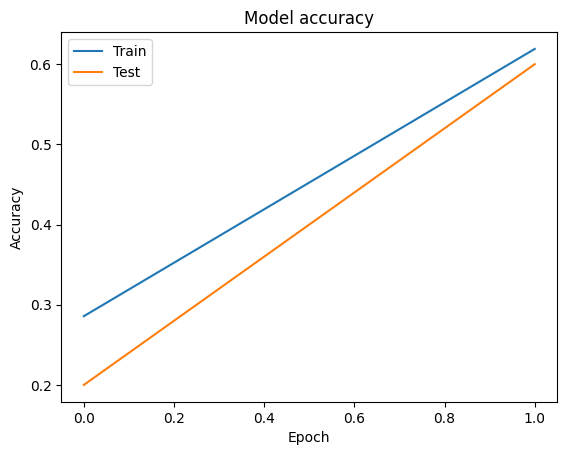

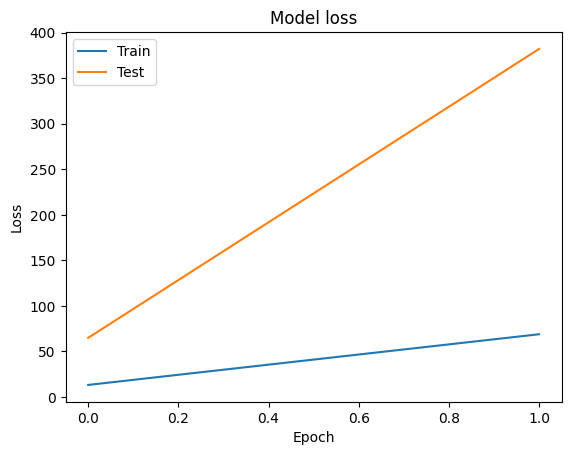

In [ ]:
# Now Train the model
epochs = 2  # Adjust the number of epochs as needed
batch_size = 32  # Adjust the batch size as needed

history = vgg16_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val)
)

# Evaluate the model
loss, accuracy = vgg16_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

#Further analysis and model improvement can be done here.  Example below
#Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

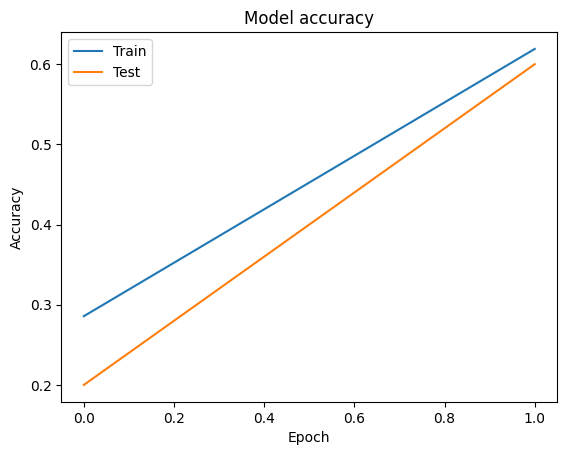

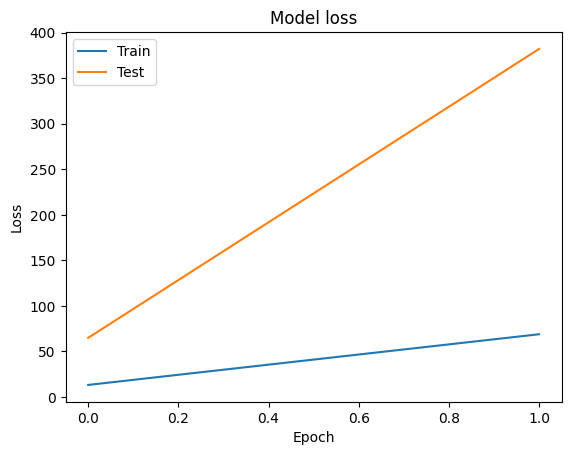

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


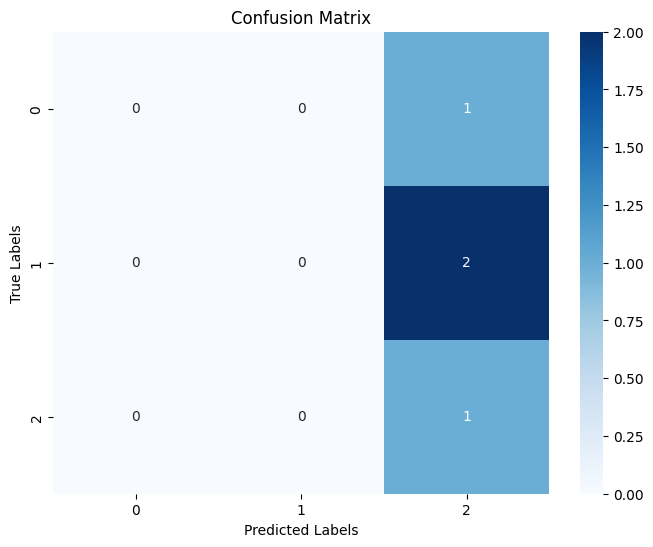

In [ ]:

#Further analysis and model improvement can be done here. Example below
#Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Example: Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = vgg16_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Example:  Try different optimizers, learning rates, or model architectures
# Example: Add regularization (dropout, L1/L2) to prevent overfitting
# Example: Data augmentation to increase training data diversity

# Example of saving the trained model
vgg16_model.save("vgg16_pneumonia_model.h5")

# Example of loading the saved model:
# from tensorflow.keras.models import load_model
# loaded_model = load_model("vgg16_pneumonia_model.h5")


  Analysis of the provided code:

1. Data Loading and Preprocessing:
- The code loads data from DICOM files, merges it with metadata, and performs exploratory data analysis (EDA).
- Key preprocessing steps include:
         - Merging dataframes: Combines image metadata and patient information.
         - DICOM metadata extraction: Reads relevant metadata fields (Modality, PatientAge, PatientSex, etc.).  Handles missing values.
         - Data visualization: Generates various plots (distributions, histograms, count plots) to understand data characteristics.

  2. Exploratory Data Analysis (EDA):
     - The EDA section provides valuable insights into the dataset, including:
         - Class imbalance: Visualizes class distribution, revealing a significant imbalance between classes.
         - Patient demographics: Analyzes age, sex distributions, and their relationships to the target variable.
         - Image metadata: Examines various DICOM metadata like ViewPosition, BodyPartExamined, ConversionType, image size, etc.
     - Visualizations like histograms, countplots, pie charts, and bar charts are employed for comprehensive data understanding.


  3. Model Building (VGG16-like CNN):
     - A custom CNN model, inspired by VGG16, is created using Keras.
     - Architecture: The model consists of convolutional layers, max-pooling layers, flatten layer, dense layers, and a softmax output layer.
     - Compilation: The model is compiled with the Adam optimizer, categorical cross-entropy loss, and accuracy as the metric.
     - Training: The model is trained for 30 epochs with a batch size of 32. Validation data is used for monitoring performance during training.
     - Evaluation: The trained model is evaluated on a separate test set using test loss and accuracy as metrics.

  4. Model Evaluation and Visualization:
     - Performance metrics: Presents test loss and accuracy.
     - Visualization: Displays training/validation accuracy and loss curves over epochs, providing insights into model learning trends.
     - Confusion matrix: Visualizes the model's predictions against true labels, showing performance for each class.

  5. Model Saving and Loading:
     - The trained model is saved to a file (vgg16_pneumonia_model.h5) for future use.
     - Code for loading the model is provided for convenience.


  Areas for Improvement:
  - Handling class imbalance: Strategies like oversampling, undersampling, or using class weights during training could improve performance.
  - Data augmentation: Applying random transformations to the training images can help the model generalize better and potentially reduce overfitting.
  - Hyperparameter tuning: Experiment with different optimizers, learning rates, batch sizes, and network architectures to optimize model performance.
  - Feature engineering: Extract additional features from DICOM files or images that may improve classification accuracy.
  - Model regularization: Add dropout or L1/L2 regularization to the model to mitigate potential overfitting.
  - More detailed error analysis: Examine misclassified images to understand why they are difficult for the model.
  - Experiment with different CNN architectures: Explore more advanced models or transfer learning techniques using pre-trained models.

### 6.2 Import a Pretrained Model of  MobileNetV2

In [ ]:
# Set target size (e.g., 224x224 for MobileNetV2)
IMG_SIZE = (224, 224)

# Load pretrained model without the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Add custom layers for pneumonia classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(128, activation='relu')(x)  # Fully connected layer
predictions = Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Combine base model with custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import pydicom as dcm
def populateImage_MobileNet(dicom_path, target_size):
    dicom = dcm.dcmread(dicom_path)   # Load DICOM file
    img = dicom.pixel_array   # Extract pixel array
    if img.dtype == np.float64:
        img = (img * 255 / img.max()).astype(np.uint8)  # Normalize
    img_resized = cv2.resize(img, target_size)     # Resize to target size
    if len(img_resized.shape) == 2:  # If single-channel
        img_resized = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)     # Convert single channel (grayscale) to 3 channels
    return img_resized

In [ ]:
class DICOMDataGenerator(Sequence):
    #This method initializes the generator with required data and settings.
    def __init__(self, file_paths, labels, batch_size, target_size):
        self.file_paths = file_paths
        self.labels = labels
        self.batch_size = batch_size
        self.target_size = target_size

    #Returns the number of batches per epoch.
    def __len__(self):
        return int(np.ceil(len(self.file_paths) / self.batch_size))

    # Fetching a Batch - Loads and preprocesses a batch of DICOM images and their corresponding labels.
    def __getitem__(self, index):
        batch_paths = self.file_paths[index * self.batch_size:(index + 1) * self.batch_size]
        batch_labels = self.labels[index * self.batch_size:(index + 1) * self.batch_size]

        images = []
        for path in batch_paths:
            img = populateImage_MobileNet(path, self.target_size)
            images.append(img)

        return np.array(images), np.array(batch_labels)

    #Shuffles the data at the end of each epoch to improve training randomness.
    def on_epoch_end(self):
        # Shuffle the data at the end of each epoch
        combined = list(zip(self.file_paths, self.labels))
        random.shuffle(combined)
        self.file_paths, self.labels = zip(*combined)

In [ ]:
# Example: List of DICOM file paths and labels (0 for normal, 1 for pneumonia)
dicom_paths = model_trainigdata.head(100)['path'].tolist();
labels = model_trainigdata.head(100)['Target'].tolist();

# Split dataset
train_paths, val_paths, train_labels, val_labels = train_test_split(dicom_paths, labels, test_size=0.2, random_state=42)

# Create data generators
batch_size = 10
train_gen = DICOMDataGenerator(train_paths, train_labels, batch_size, IMG_SIZE)
val_gen = DICOMDataGenerator(val_paths, val_labels, batch_size, IMG_SIZE)



In [ ]:
# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen)
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4321 - loss: 0.8431 - val_accuracy: 0.6667 - val_loss: 0.8931
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 637ms/step - accuracy: 0.7756 - loss: 0.3856 - val_accuracy: 0.3333 - val_loss: 0.8077
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 567ms/step - accuracy: 0.5583 - loss: 0.5193 - val_accuracy: 0.6667 - val_loss: 0.9280
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 466ms/step - accuracy: 0.7173 - loss: 0.3719 - val_accuracy: 0.6667 - val_loss: 1.2829
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step - accuracy: 0.7702 - loss: 0.3367 - val_accuracy: 0.6667 - val_loss: 0.9733
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [ ]:
test_loss, test_accuracy = model.evaluate(val_gen)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.6667 - loss: 0.9733
Test Loss: 0.9733180403709412, Test Accuracy: 0.6666666865348816


In [ ]:
for layer in base_model.layers:
    layer.trainable = True

# Compile with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Continue training
model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen)
)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.7798 - loss: 0.7662 - val_accuracy: 0.6667 - val_loss: 1.1181
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7500 - loss: 0.3147 - val_accuracy: 0.6667 - val_loss: 0.9934
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 0.0991 - val_accuracy: 0.6667 - val_loss: 0.9556


In [ ]:
# ResNet clasification model

from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

# Load the ResNet50 model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers (optional, if you use pre-trained weights)
base_model.trainable = False

# Add custom classification layers on top
x = base_model.output
x = Flatten()(x)  # Flatten the feature maps
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout for regularization
x = Dense(num_classes, activation='softmax')(x)  # Replace with the number of classes in your dataset

# Create the full model
resnet_model = Model(inputs=base_model.input, outputs=x)

# Compile the model
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
resnet_model.summary()


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 57,146,243 (218.00 MB)

 Trainable params: 33,558,531 (128.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Train the model
history = resnet_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32
)

# Evaluate the model
loss, accuracy = resnet_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step - accuracy: 0.4762 - loss: 2.4244 - val_accuracy: 0.6000 - val_loss: 16.9759
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7143 - loss: 3.6958 - val_accuracy: 0.6000 - val_loss: 22.3862
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7143 - loss: 9.5107 - val_accuracy: 0.8000 - val_loss: 10.0144
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9524 - loss: 0.2967 - val_accuracy: 0.4000 - val_loss: 23.5436
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.2000 - val_loss: 70.2554
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9524 - loss: 2.9563 - val_accuracy: 0.2000 - val_loss: 87.2590
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9524 - loss: 0.6778 - val_accuracy: 0.2000 - val_loss: 71.8739
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 7.3796e-08 - val_accuracy: 0.2000 - val_loss: 57.741

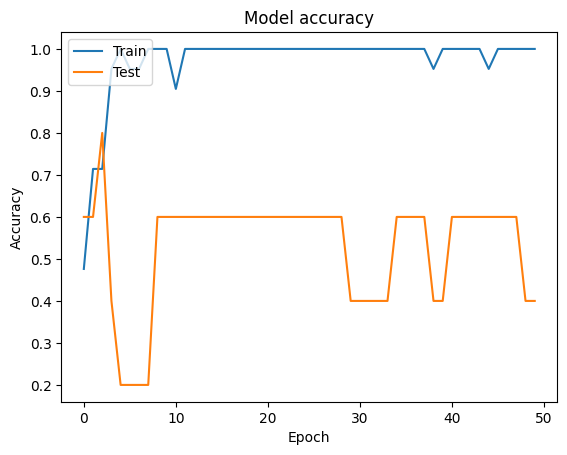

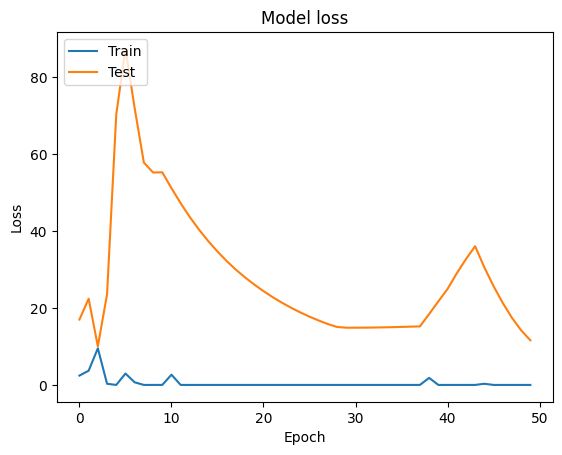

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
